<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Load Data and import libraries
    </span>
</div>

In [2]:
import kagglehub

data_path = kagglehub.dataset_download("khaledzakarya/brain-tumar-dataset")

print("Path to dataset files:", data_path)

Path to dataset files: /kaggle/input/brain-tumar-dataset


In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
os.path.join(data_path , os.listdir(data_path)[0])

'/kaggle/input/brain-tumar-dataset/Brain scans'

In [6]:
path = os.path.join(data_path , os.listdir(data_path)[0])
categories = [os.path.join('No tumor',"Train"), os.path.join('Tumor','TRAIN')]

data = []

for category in categories:
    cat_path = os.path.join(path,category)

    for name in os.listdir(cat_path):
        if name.endswith('.jpg') and '_mask' not in name:
            image_path = os.path.join(cat_path,name)
            data.append({'image_path' : image_path,'label':category})

In [7]:
df = pd.DataFrame(data)

In [8]:
df['label'] = df['label'].str.split('\/').str[0]

<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Quik Exploration
    </span>
</div>

In [9]:
df.head()

,image_path,label
0,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor
1,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor
2,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor
3,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor
4,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor


In [10]:
df.sample(5)

,image_path,label
354,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor
898,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
635,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
983,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
419,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor


In [11]:
df.tail()

,image_path,label
996,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
997,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
998,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
999,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor
1000,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor


In [26]:
df.shape

(1001, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1001 non-null   object
 1   label       1001 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [12]:
df.describe()

,image_path,label
count,1001,1001
unique,1001,2
top,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor
freq,1,501


In [29]:
df['label'].value_counts()

,count
label,
No tumor,501
Tumor,500


<ipython-input-30-d6b47165ddb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df , x = 'label',palette = 'viridis')


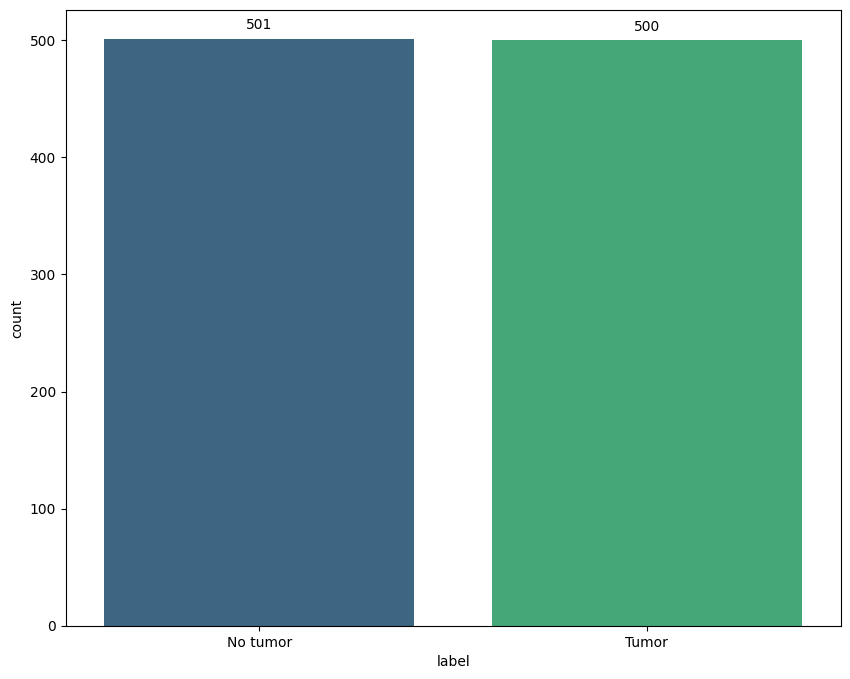

In [30]:
plt.figure(figsize=(10, 8))

ax = sns.countplot(data = df , x = 'label',palette = 'viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

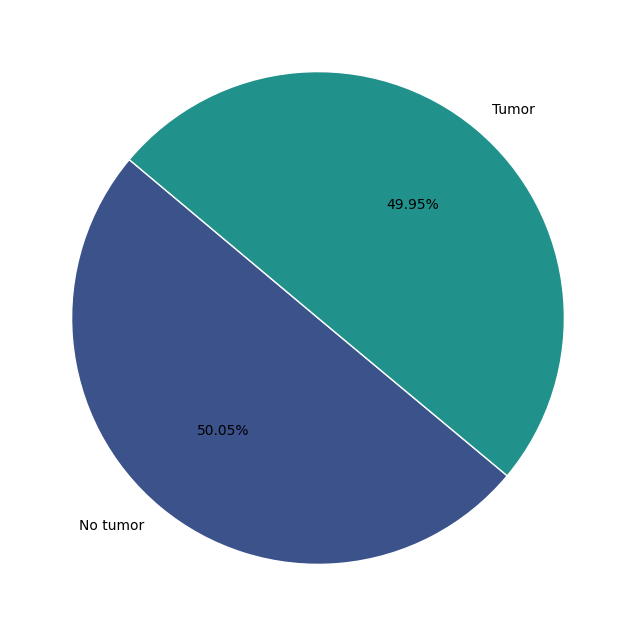

In [31]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette('viridis',3)
plt.pie(df['label'].value_counts().values,labels = df['label'].value_counts().index,autopct = '%1.2f%%',startangle=140, colors=palette, wedgeprops={'edgecolor': 'white'})
plt.show()

In [23]:
categories2 = list(df['label'].unique())

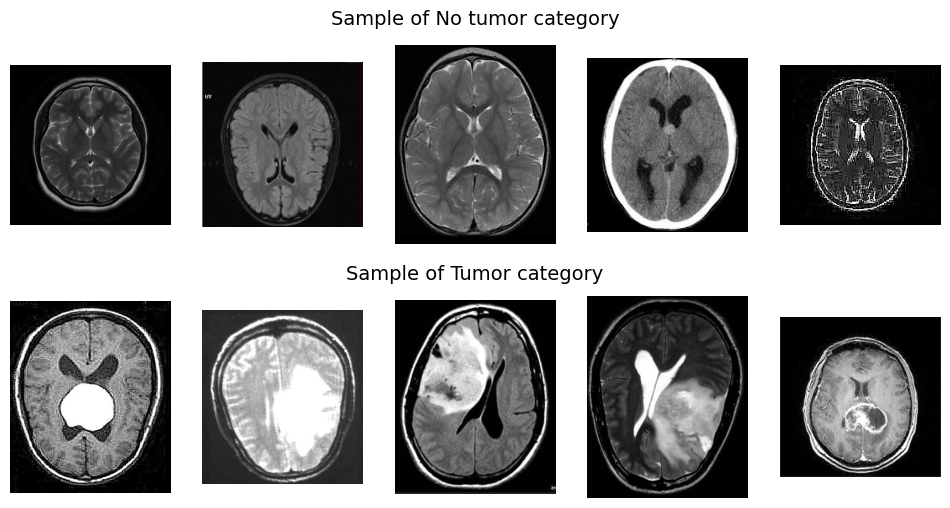

In [35]:
import cv2
fig, axes = plt.subplots(2 , 5,figsize =(12,6))

for i , cat in enumerate(categories2):
    axes[i,2].set_title(f'Sample of {cat} category',fontsize=14, pad=15 )
    for j in range(5):
        image = df[df['label'] == cat].sample(1)['image_path'].iloc[0]
        axes[i, j].imshow(cv2.imread(image))
        axes[i, j].axis('off')
plt.show()


In [ ]:
df_resampled['cat_encoded'].value_counts()

,count
cat_encoded,
0,437
1,437
2,437


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Preprocessing
    </span>
</div>

In [13]:
df_resampled = df.copy()

In [14]:
from sklearn.model_selection import train_test_split

train , temp = train_test_split(df_resampled , train_size = 0.8 , random_state = 42 , stratify= df_resampled['label'])

valid , test = train_test_split(temp , train_size = 0.5 , random_state = 42 , stratify= temp['label'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

datagen = ImageDataGenerator(rescale = 1/255)
train_prep = datagen.flow_from_dataframe(train, x_col = 'image_path',y_col = 'label',target_size = img_size, batch_size = batch_size, class_mode = 'sparse',color_mode='rgb',
    shuffle=False, seed=42)

valid_prep = datagen.flow_from_dataframe(valid, x_col = 'image_path',y_col = 'label',target_size = img_size, batch_size = batch_size, class_mode = 'sparse',color_mode='rgb',
    shuffle=False, seed=42)

test_prep = datagen.flow_from_dataframe(test, x_col = 'image_path',y_col = 'label',target_size = img_size, batch_size = batch_size, class_mode = 'sparse',color_mode='rgb',
    shuffle=False, seed=42)


Found 800 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Found 101 validated image filenames belonging to 2 classes.


In [29]:
label_mapping = train_prep.class_indices
print("Label encoding mapping:", label_mapping)

Label encoding mapping: {'No tumor': 0, 'Tumor': 1}


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Modeling - VGG16
    </span>
</div>

In [114]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, GlobalAveragePooling2D,Reshape
from tensorflow.keras.optimizers import Adam

In [115]:
def VGG16_Modified(input_shape):
  inputs = Input(shape=input_shape)
  base = VGG16(include_top=False, weights='imagenet', input_tensor=inputs)

  for layer in base.layers[:-4]:
    layer.trainable = False

  x = base.output

  attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
  x = GaussianNoise(0.25)(attention_output)
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = GaussianNoise(0.25)(x)
  x = Dropout(0.3)(x)

  x = Dense(256, activation='relu')(x)
  x = Dropout(0.3)(x)

  outputs = Dense(3, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)

  return model

In [116]:
input_shape = (224, 224, 3)
model = VGG16_Modified(input_shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [117]:
# hist = model.fit(train_prep, epochs=5, validation_data=valid_prep, verbose=1)

<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Moledling - Xception
    </span>
</div>

In [118]:
from tensorflow.keras.applications import Xception

In [119]:
def Xception_Modified(input_shape):
  inputs = Input(input_shape)
  base = Xception(include_top=False, weights='imagenet', input_tensor=inputs)

  for layer in base.layers[:-4]:
    layer.trainable = False

  x = base.output

  attention_output = MultiHeadAttention(num_heads=8, key_dim=x.shape[-1])(x, x)
  x = GaussianNoise(0.2)(attention_output)
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  x = BatchNormalization()(x)
  x = GaussianNoise(0.2)(x)
  x = Dropout(0.3)(x)

  x = Dense(256, activation='relu')(x)
  x = Dropout(0.3)(x)

  outputs = Dense(2, activation='softmax')(x)

  model = Model(inputs=inputs, outputs=outputs)

  return model

In [120]:
input_shape = (224, 224, 3)

model2 = Xception_Modified(input_shape)

model2.compile(optimizer=Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [121]:
hist2 = model2.fit(train_prep, epochs=5,
                   validation_data=valid_prep, verbose=1)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 413ms/step - accuracy: 0.7879 - loss: 0.4740 - val_accuracy: 0.9200 - val_loss: 0.3207
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 317ms/step - accuracy: 0.9562 - loss: 0.1225 - val_accuracy: 0.9100 - val_loss: 0.2242
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step - accuracy: 0.9830 - loss: 0.0457 - val_accuracy: 0.9400 - val_loss: 0.1525
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.9903 - loss: 0.0249 - val_accuracy: 0.9500 - val_loss: 0.1539
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 305ms/step - accuracy: 0.9944 - loss: 0.0139 - val_accuracy: 0.9400 - val_loss: 0.2211


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Save Model
    </span>
</div>

In [137]:
from tensorflow import keras

In [138]:
model2.save('Brain_Classification_Model.h5')

In [16]:
from tensorflow.keras.models import load_model

model_loaded = load_model("/kaggle/input/brain_tumor_classifier/tensorflow2/default/1/Brain_Classification_Model.h5")

2025-05-17 11:12:19.395039: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<div style="
    background-color: #393E46;
    border-radius:  12px 12px;
    text-align: center;
    padding: 15px;
    margin: 10px 0;
">
    <span style="
        font-family: 'Comic Sans MS', 'Comic Neue', cursive;
        font-size: 28px;
        font-weight: bold;
        padding: 5px 15px;
        border-radius: 5px;
        color: #fff;
    ">
         Evaluation
    </span>
</div>

In [17]:
test.sample(1)

,image_path,label
565,/kaggle/input/brain-tumar-dataset/Brain scans/...,Tumor


In [18]:
test1 = test.sample(5)['image_path'].iloc[0]
res = test.loc[test['image_path'] == test1]
res

,image_path,label
489,/kaggle/input/brain-tumar-dataset/Brain scans/...,No tumor


In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = test1
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)


In [125]:
prediction = model_.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: [[3.332616e-05 9.999666e-01]]


In [126]:
predicted_class = categories2[np.argmax(prediction)]
print("Predicted Class:", predicted_class)

Predicted Class: Tumor


In [21]:
prediction2 = model2.predict(test_prep)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step


In [24]:
pred_indices = np.argmax(prediction2, axis=1)
predicted_classes = [categories2[i] for i in pred_indices]

print(predicted_classes)

['Tumor', 'Tumor', 'Tumor', 'No tumor', 'Tumor', 'Tumor', 'Tumor', 'No tumor', 'No tumor', 'Tumor', 'Tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'Tumor', 'No tumor', 'Tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'Tumor', 'Tumor', 'No tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'Tumor', 'No tumor', 'No tumor', 'Tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'No tumor', 'No tumor', 'No tumor', 'No tumor', 'Tumor', 'Tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'Tumor', 'No tumor', 'No tumor', 'Tumor', 'No

In [25]:
y_true = test_prep.classes

In [26]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

accuracy = accuracy_score(y_true, pred_indices)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_true ,pred_indices))

Test Accuracy: 97.03%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.94      0.97        50

    accuracy                           0.97       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



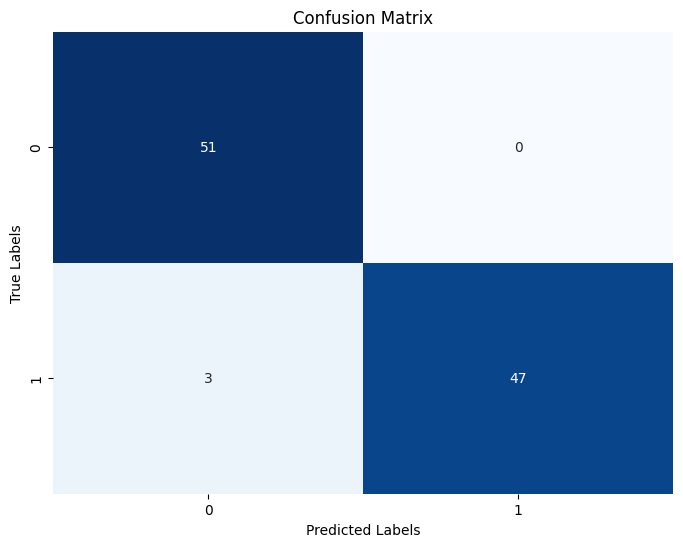

In [27]:
cm = confusion_matrix(y_true, pred_indices)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

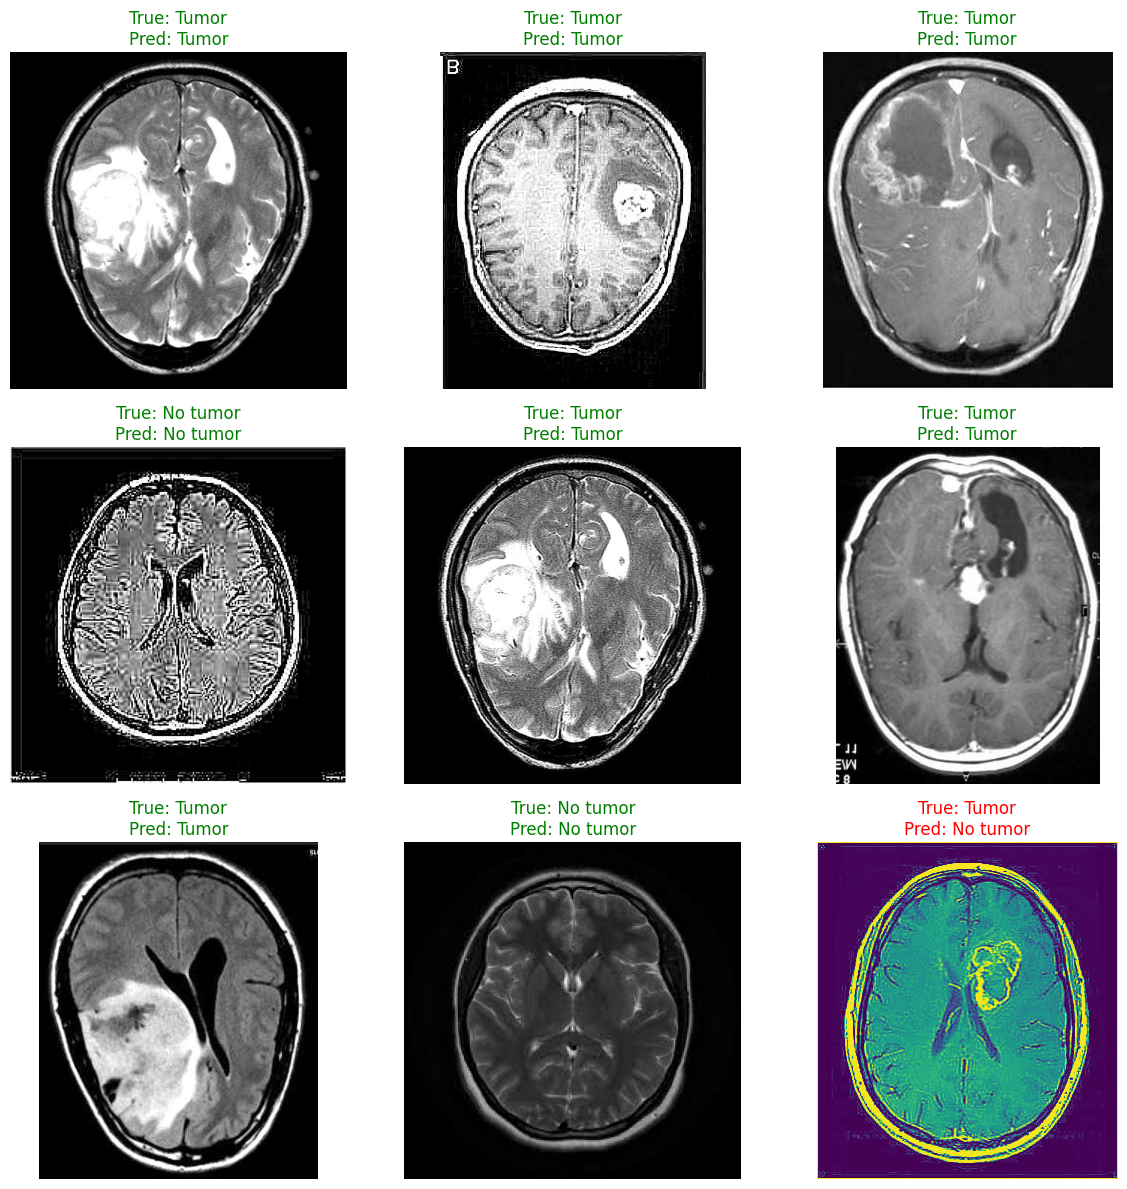

In [28]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = list(test_prep.class_indices.keys())

filepaths = test_prep.filepaths
N = 9
plt.figure(figsize=(12, 12))
for i in range(N):
    img = plt.imread(filepaths[i])

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')


    true_label = class_labels[y_true[i]]
    pred_label = class_labels[pred_indices[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)

plt.tight_layout()
plt.show()
